<a href="https://www.kaggle.com/code/yasinsoylu123/cancer-detection-cnn?scriptVersionId=112078845" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#import neccessary Libraries and modules
import pandas as pd
import numpy as np
import os
from glob import glob
import random
import matplotlib.pylab as plt

from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
imagePatches = glob('../input/breast-histopathology-images/IDC_regular_ps50_idx5/**/*.png', recursive=True)
for filename in imagePatches[0:10]:
    print(filename)

../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1351_y1101_class0.png
../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1501_y501_class0.png
../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1501_y1101_class0.png
../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x451_y901_class0.png
../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x801_y451_class0.png
../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x151_y1051_class0.png
../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1351_y901_class0.png
../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x701_y651_class0.png
../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x951_y1401_class0.png
../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x601_y501_cla

In [3]:
# Two arrays holding images by class type

class0 = [] # 0 = no cancer
class1 = [] # 1 = cancer

for filename in imagePatches:
    if filename.endswith("class0.png"):
         class0.append(filename)
    else:
        class1.append(filename)

In [4]:
len(class0)

198738

In [5]:
len(class1)

78786

In [6]:
sampled_class0 = random.sample(class0, 78786)
sampled_class1 = random.sample(class1, 78786)
#len(sampled_class0)

In [7]:
from matplotlib.image import imread
import cv2

def get_image_arrays(data, label):
    img_arrays = []
    for i in data:
        if i.endswith('.png'):
            img = cv2.imread(i ,cv2.IMREAD_COLOR)
            img_sized = cv2.resize(img, (64, 64), interpolation=cv2.INTER_LINEAR)
            img_arrays.append([img_sized, label])
    return img_arrays


In [8]:
class0_array = get_image_arrays(sampled_class0, 0)
class1_array = get_image_arrays(sampled_class1, 1)

In [9]:
test = cv2.imread('../input/breast-histopathology-images/IDC_regular_ps50_idx5/13689/1/13689_idx5_x801_y1501_class1.png' ,cv2.IMREAD_COLOR)
test.shape

(50, 50, 3)

In [10]:
from keras.preprocessing.image import load_img, img_to_array

In [11]:
def show_img(files):
    plt.figure(figsize= (10,10))
    ind = np.random.randint(0, len(files), 25)
    i=0
    for loc in ind:
        plt.subplot(5,5,i+1)
        sample = load_img(files[loc], target_size=(150,150))
        sample = img_to_array(sample)
        plt.axis("off")
        plt.imshow(sample.astype("uint8"))
        i+=1

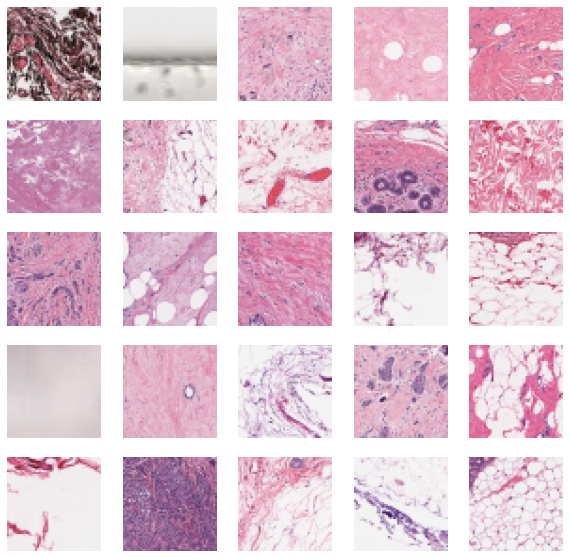

In [12]:
show_img(imagePatches)

In [13]:
combined_data = np.concatenate((class0_array, class1_array))
random.seed(42)
random.shuffle(combined_data)

In [14]:
X = []
y = []

for features,label in combined_data:
    X.append(features)
    y.append(label)

In [15]:
X = np.array(X).reshape(-1, 64, 64,3)

In [16]:
X.shape

(157572, 64, 64, 3)

In [17]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(118179, 64, 64, 3) (39393, 64, 64, 3) (118179, 2) (39393, 2)


In [ ]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(64,64,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=32,kernel_size=(4,4),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer ='adam', metrics= ['accuracy'])


model.summary()

In [19]:
epochs = 50  
batch_size = 250

In [20]:
callbacks = [EarlyStopping(monitor='val_loss', patience=5, verbose=1),
                ModelCheckpoint('model.hdf5',save_best_only=True)]

In [21]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs= epochs,
    verbose = 2,
    batch_size=batch_size,callbacks=callbacks
    )

2022-11-25 17:40:34.359271: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1452183552 exceeds 10% of free system memory.
2022-11-25 17:40:36.122852: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1452183552 exceeds 10% of free system memory.
2022-11-25 17:40:37.441432: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-11-25 17:40:39.973734: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005
2022-11-25 17:40:56.328230: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 484061184 exceeds 10% of free system memory.
2022-11-25 17:40:57.290606: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 484061184 exceeds 10% of free system memory.


473/473 - 21s - loss: 0.6577 - accuracy: 0.8544 - val_loss: 0.3159 - val_accuracy: 0.8680
Epoch 2/50
473/473 - 6s - loss: 0.3164 - accuracy: 0.8696 - val_loss: 0.4576 - val_accuracy: 0.8247
Epoch 3/50
473/473 - 6s - loss: 0.3121 - accuracy: 0.8718 - val_loss: 0.3941 - val_accuracy: 0.8523
Epoch 4/50
473/473 - 6s - loss: 0.3066 - accuracy: 0.8735 - val_loss: 0.3680 - val_accuracy: 0.8673
Epoch 5/50
473/473 - 6s - loss: 0.3041 - accuracy: 0.8745 - val_loss: 0.3357 - val_accuracy: 0.8789
Epoch 6/50
473/473 - 6s - loss: 0.3053 - accuracy: 0.8763 - val_loss: 0.3338 - val_accuracy: 0.8752
Epoch 00006: early stopping


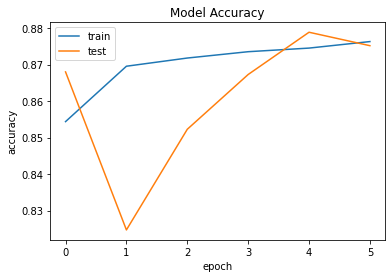

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

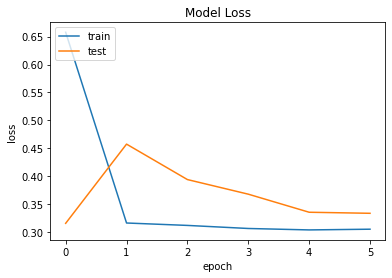

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
loss,accuracy=model.evaluate(X_test,y_test)

2022-11-25 17:41:30.257415: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 484061184 exceeds 10% of free system memory.


1232/1232 [==============================] - 3s 2ms/step - loss: 0.3338 - accuracy: 0.8752


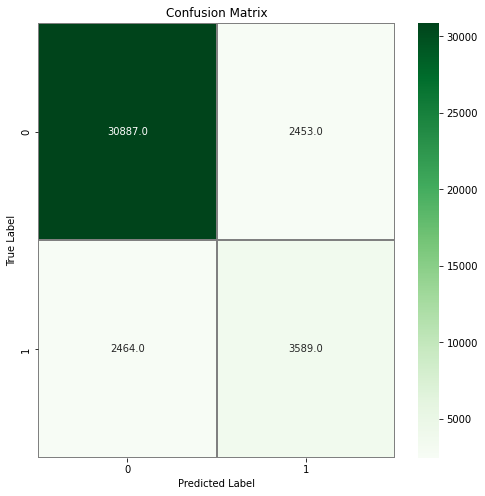

In [25]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [26]:
from sklearn.metrics import classification_report

print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     33340
           1       0.59      0.59      0.59      6053

    accuracy                           0.88     39393
   macro avg       0.76      0.76      0.76     39393
weighted avg       0.88      0.88      0.88     39393



In [27]:
def img_plot(arr,index=0):
    plt.title('Test Image')
    plt.imshow(arr[index])

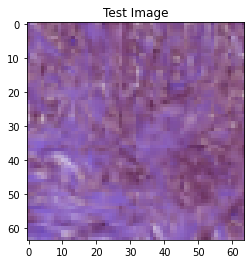

In [28]:
index1 = 2
img_plot(X_test, index1)

In [29]:
input1 = X_test[index1:index1+1]
print('Input Index =',index1)

Input Index = 2


In [30]:
cnn_pred1 = model.predict(input1)[0].argmax()
label1 = y_test[index1].argmax()

In [31]:
print('Predicted Value using  cnn model',cnn_pred1)
print("\nTrue Value",label1)

Predicted Value using  cnn model 1

True Value 0
